Tutorial 1
==========

In this first tutorial, the NMR relaxation time T1 of water is measured using NMRforMD. 
[MDAnalysis](https://www.mdanalysis.org), [numpy](https://www.numpy.org), and [matplotlib](https://www.matplotlib.org) and NMRforMD must be installed. 

The system is a short molecular dynamics trajectory of bulk TIP4P water molecules in the NVT ensemble 
simulated with [LAMMPS](https://www.lammps.org/) (temperature 20°C). 

If you want to generate longer trajectory files, the 
input files are available in this [repository](https://github.com/simongravelle/nmrformd/tree/main/tests).

![](https://raw.githubusercontent.com/simongravelle/nmrformd/main/tests/bulk_water/water.png)

File preparation
----------------

Clone the NMRforMD repository:

```bash

    git clone git@github.com:simongravelle/nmrformd.git

```

Define a path to the data file:

In [31]:
datapath = "../../../tests/bulk_water/"

Import the libraries
--------------------

Open a Python script, import numpy, MDAnalysis, pyplot, and NMRforMD:

In [32]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

Create a MDAnalysis universe
----------------------------

Import the configuration file and the trajectory:

In [33]:
u = mda.Universe(datapath+"conf.data", datapath+"traj.xtc")

Let us extract a few information from the universe:

In [34]:
n_molecules = u.atoms.select_atoms("type 1").atoms.n_atoms
print(f"The number of water molecules is {n_molecules}")
timestep = np.int32(u.trajectory.dt)
print(f"The timestep is {timestep} ps")
total_time = np.int32(u.trajectory.totaltime)
print(f"The total simulation time is {total_time} ps")

The number of water molecules is 400
The timestep is 1 ps
The total simulation time is 1000 ps


Run NMRforMD
------------

Let us isolate a group of atoms containing all the hydrogen atoms of the system:

In [35]:
group_i = "type 2"

Then, let us run NMRforMD:

In [36]:
nmr_result = nmrmd.NMR(u, [group_i, group_i], number_i=40)

KeyboardInterrupt: 

With 'number_i = 40', only 40 randomly selected atoms within 'group_i' are considered for the calculation. Increase this number for better resolution. Use 'number_i = 0' to consider all the atoms.

Extract T1/T2
-------------

Access the calculated value of NMR relaxation time T1:

In [ ]:
T1 = np.round(nmr_result.T1,2)
print(f"NMR relaxation time T1 = {T1} s")

NMR relaxation time T1 = 4.09 s


Plot the spectrum and the correlation functions
-----------------------------------------------

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
fontsize = 20
font = {'color':  'black', 'weight': 'normal', 'size': fontsize}
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

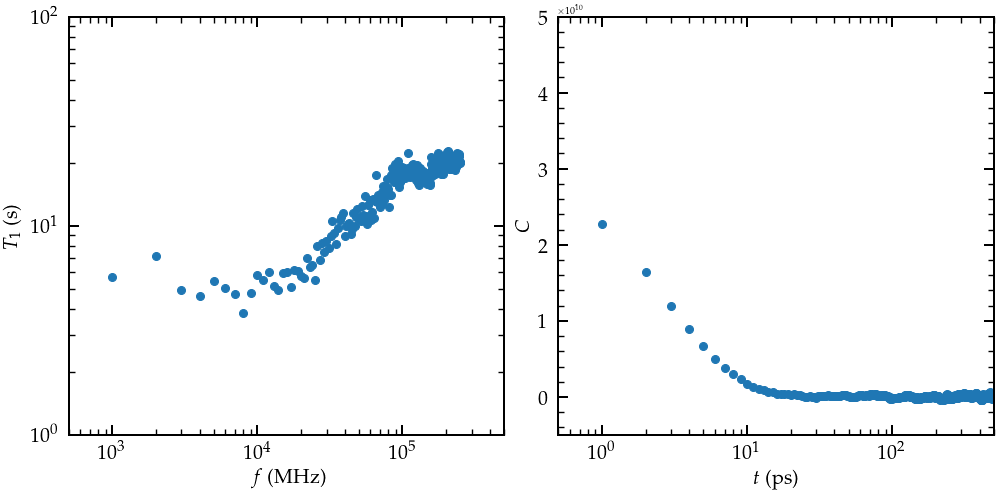

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(1, 2, 1)
ax1.loglog(nmr_result.f[:-250], 1/nmr_result.R1[:-250], 'o', markersize=8)
ax1.set_xlabel(r"$f$ (MHz)", fontdict=font)
ax1.set_ylabel(r'$T_1$ (s)', fontdict=font)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.tick_params(axis='x', which='major', pad=10)
ax1.tick_params(axis='y', which='major', pad=10)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlim(5e2, 5e5)
plt.ylim(1, 100)
ax2 = plt.subplot(1, 2, 2)
ax2.semilogx(nmr_result.t[:-250], nmr_result.gij[0][:-250], 'o', markersize=8)
ax2.set_xlabel(r"$t$ (ps)", fontdict=font)
ax2.set_ylabel(r'$C$', fontdict=font)
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["right"].set_linewidth(2)
ax2.tick_params(axis='x', which='major', pad=10)
ax2.tick_params(axis='y', which='major', pad=10)
ax2.minorticks_on()
ax2.tick_params('both', length=10, width=2, which='major', direction='in')
ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlim(5e-1, 5e2)
plt.ylim(-0.5e10, 5e10)
fig.tight_layout()
plt.show()